#  Classification :-
## HR Data (Employ will leave or stay prediction) :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import time
%matplotlib inline

In [2]:
df1 = pd.read_csv("C:\\Users\\admin\\Documents\\My Tableau Repository\\Datasources\\hr_data.csv")
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df1.duplicated().sum()

3008

In [4]:
df1.drop_duplicates(inplace=True)

In [5]:
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [6]:
df1.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [8]:
df1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
df1.describe(include='object')

,sales,salary
count,11991,11991
unique,10,3
top,sales,low
freq,3239,5740


In [10]:
df1.rename(columns={'sales':'depertment'},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


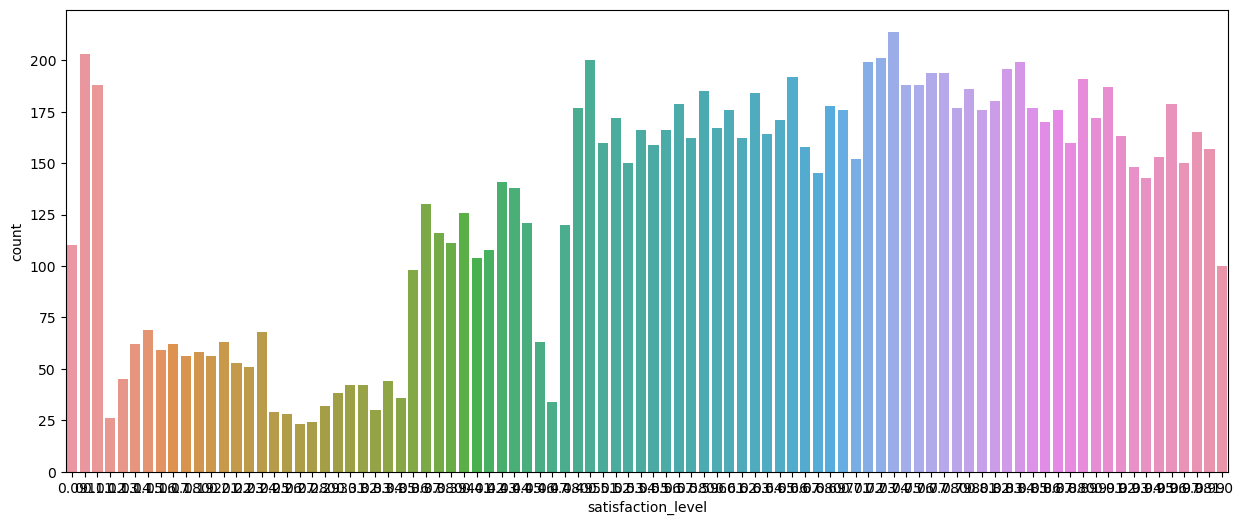

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


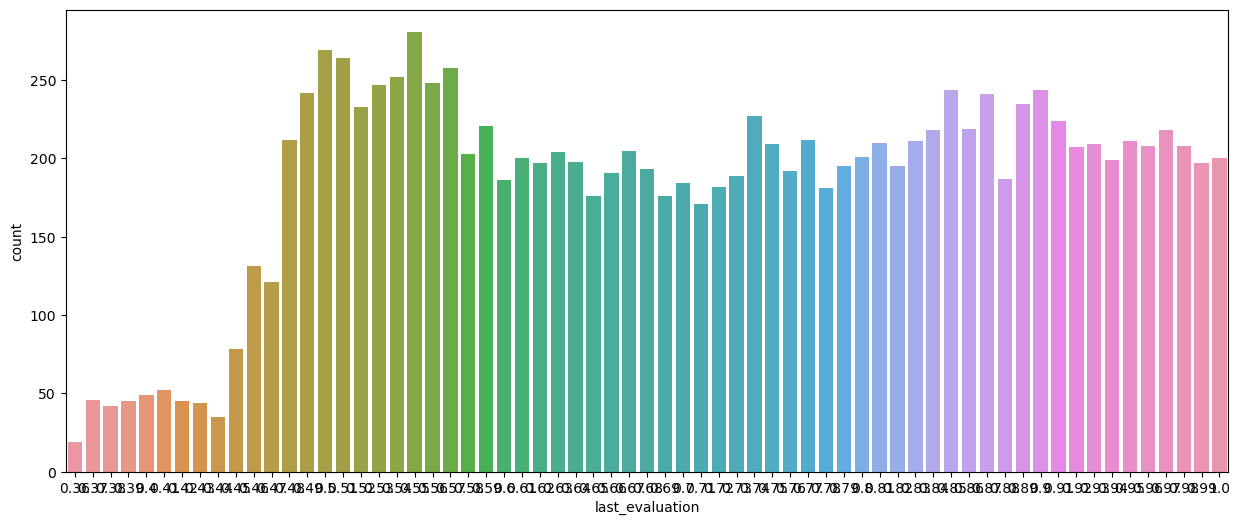

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


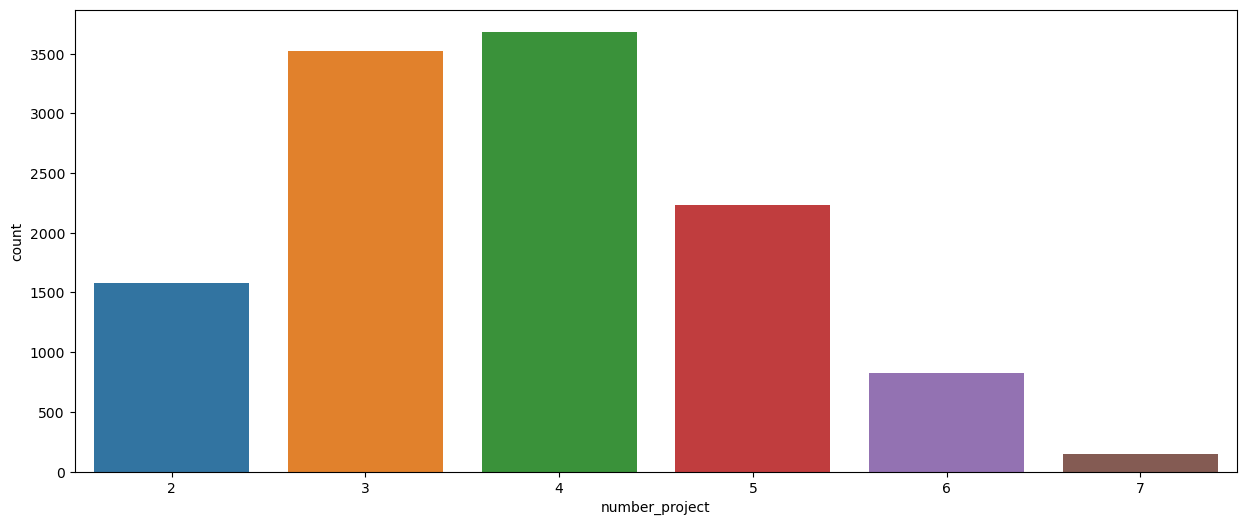

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


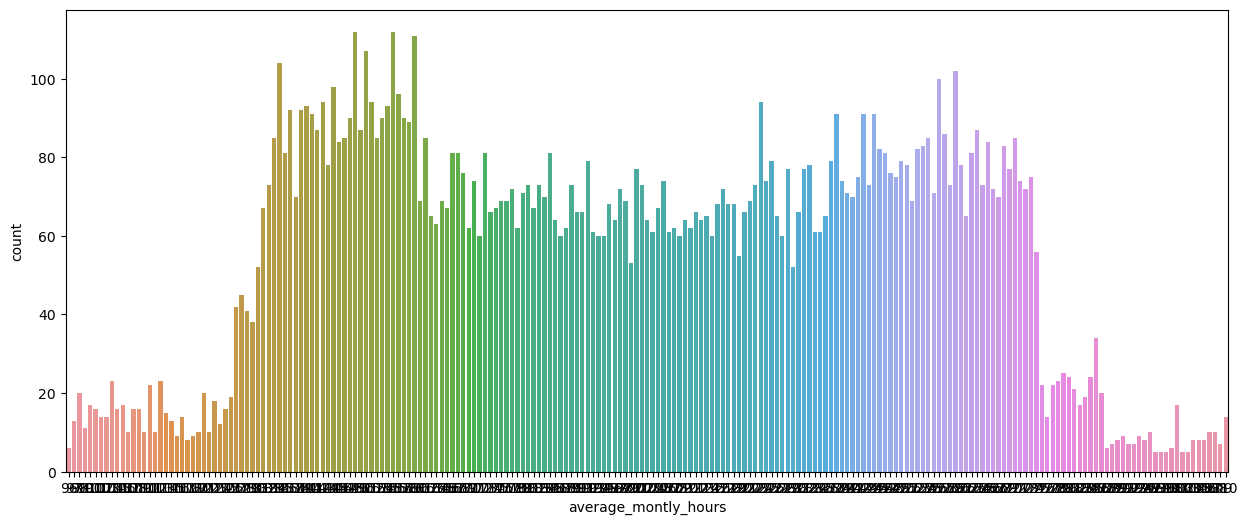

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


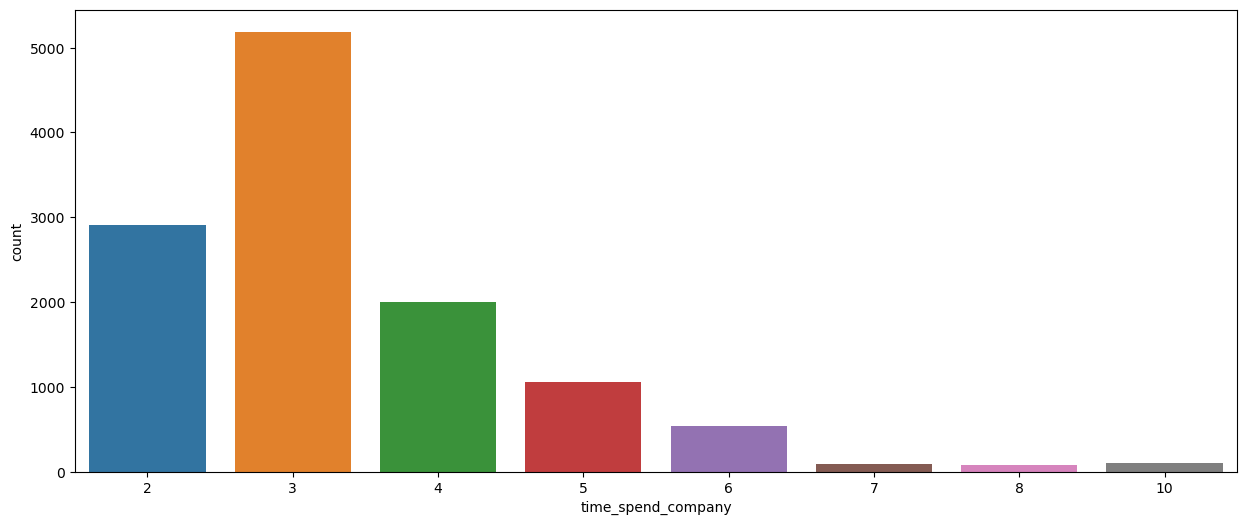

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


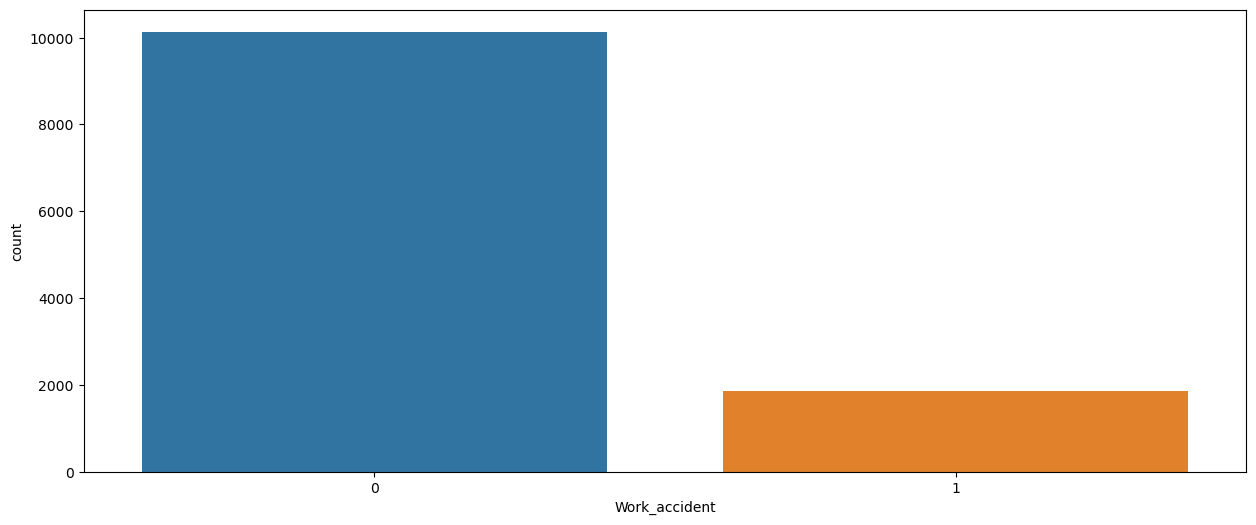

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


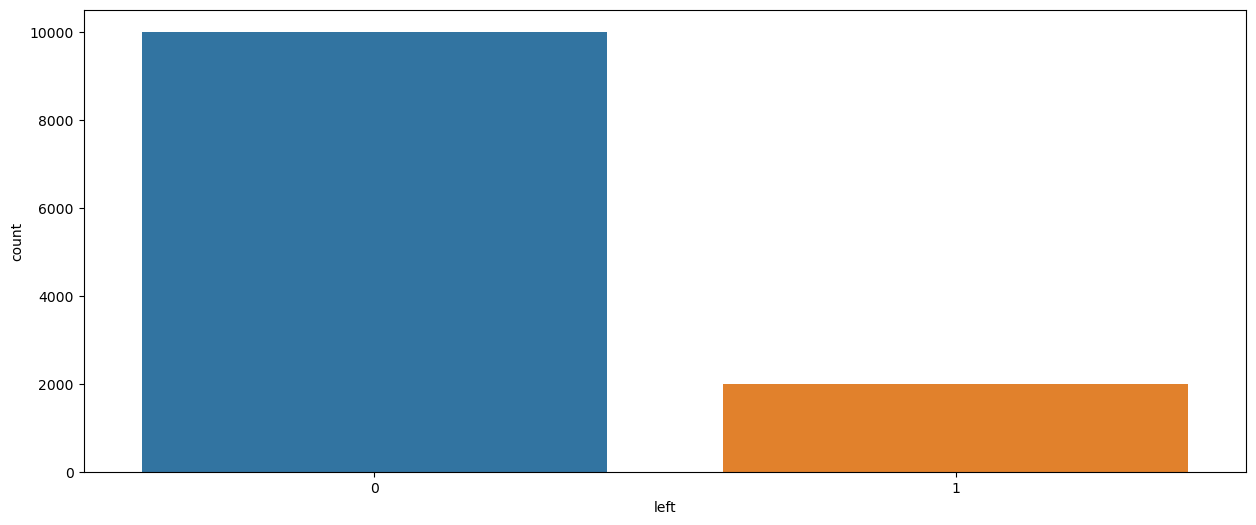

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


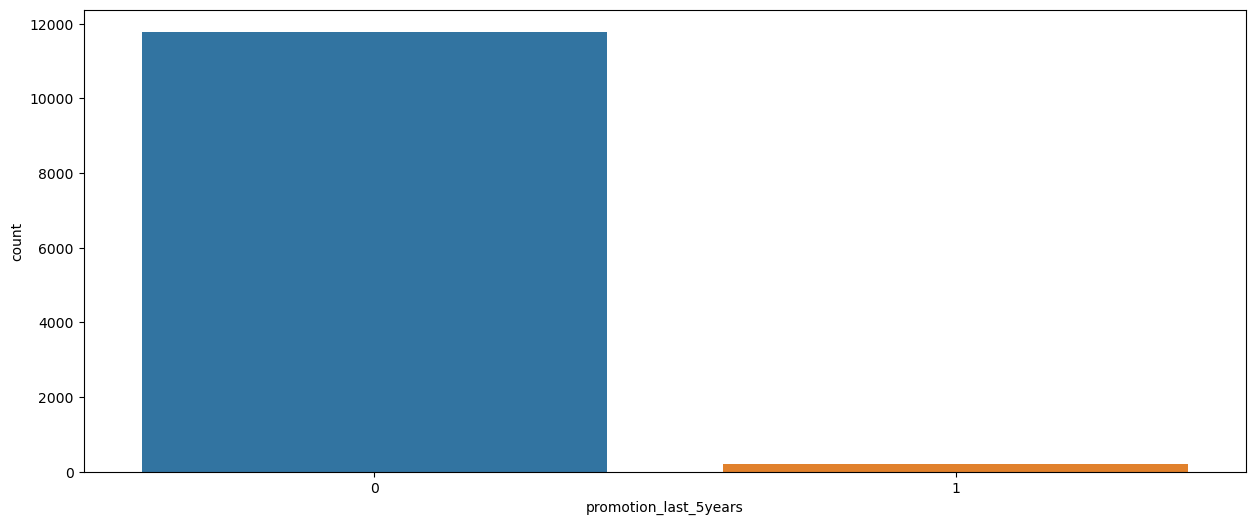

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


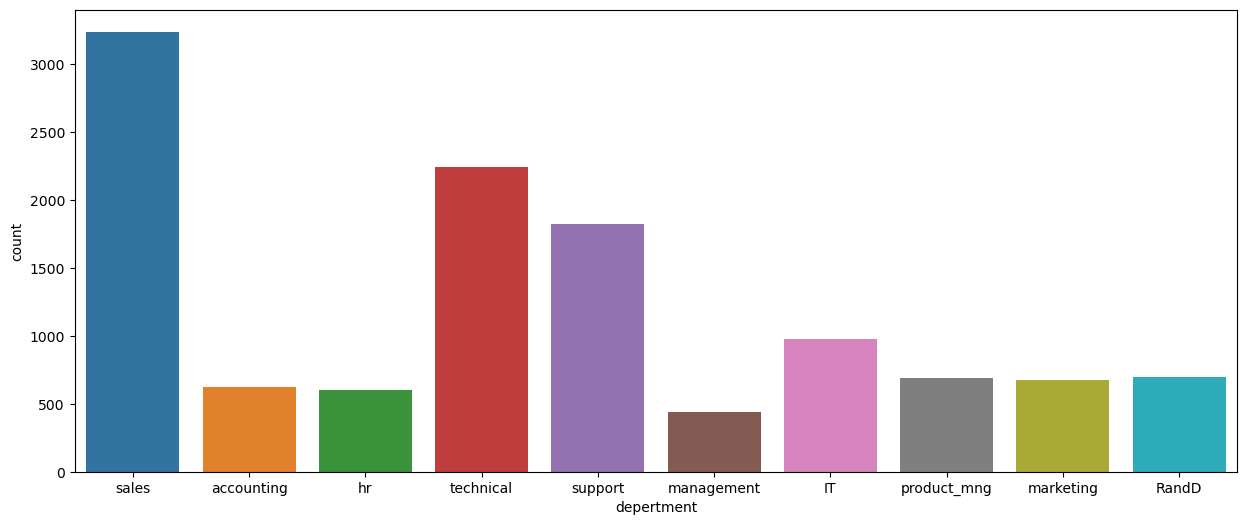

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


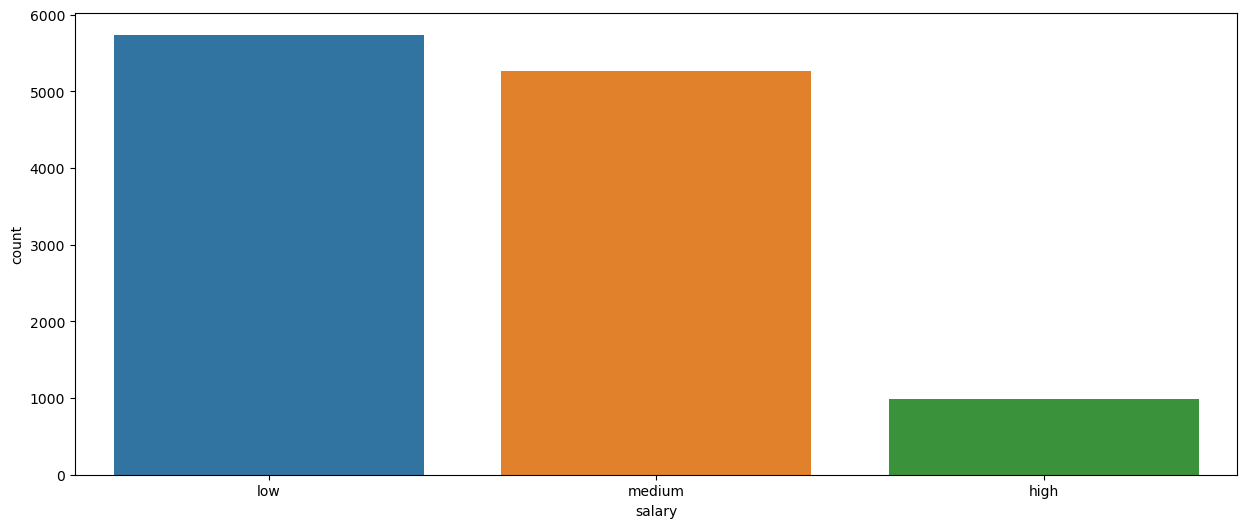

In [11]:
strat = time.time()
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sb.countplot(df1[i],data=df1)
    plt.show()
end = time.time()    

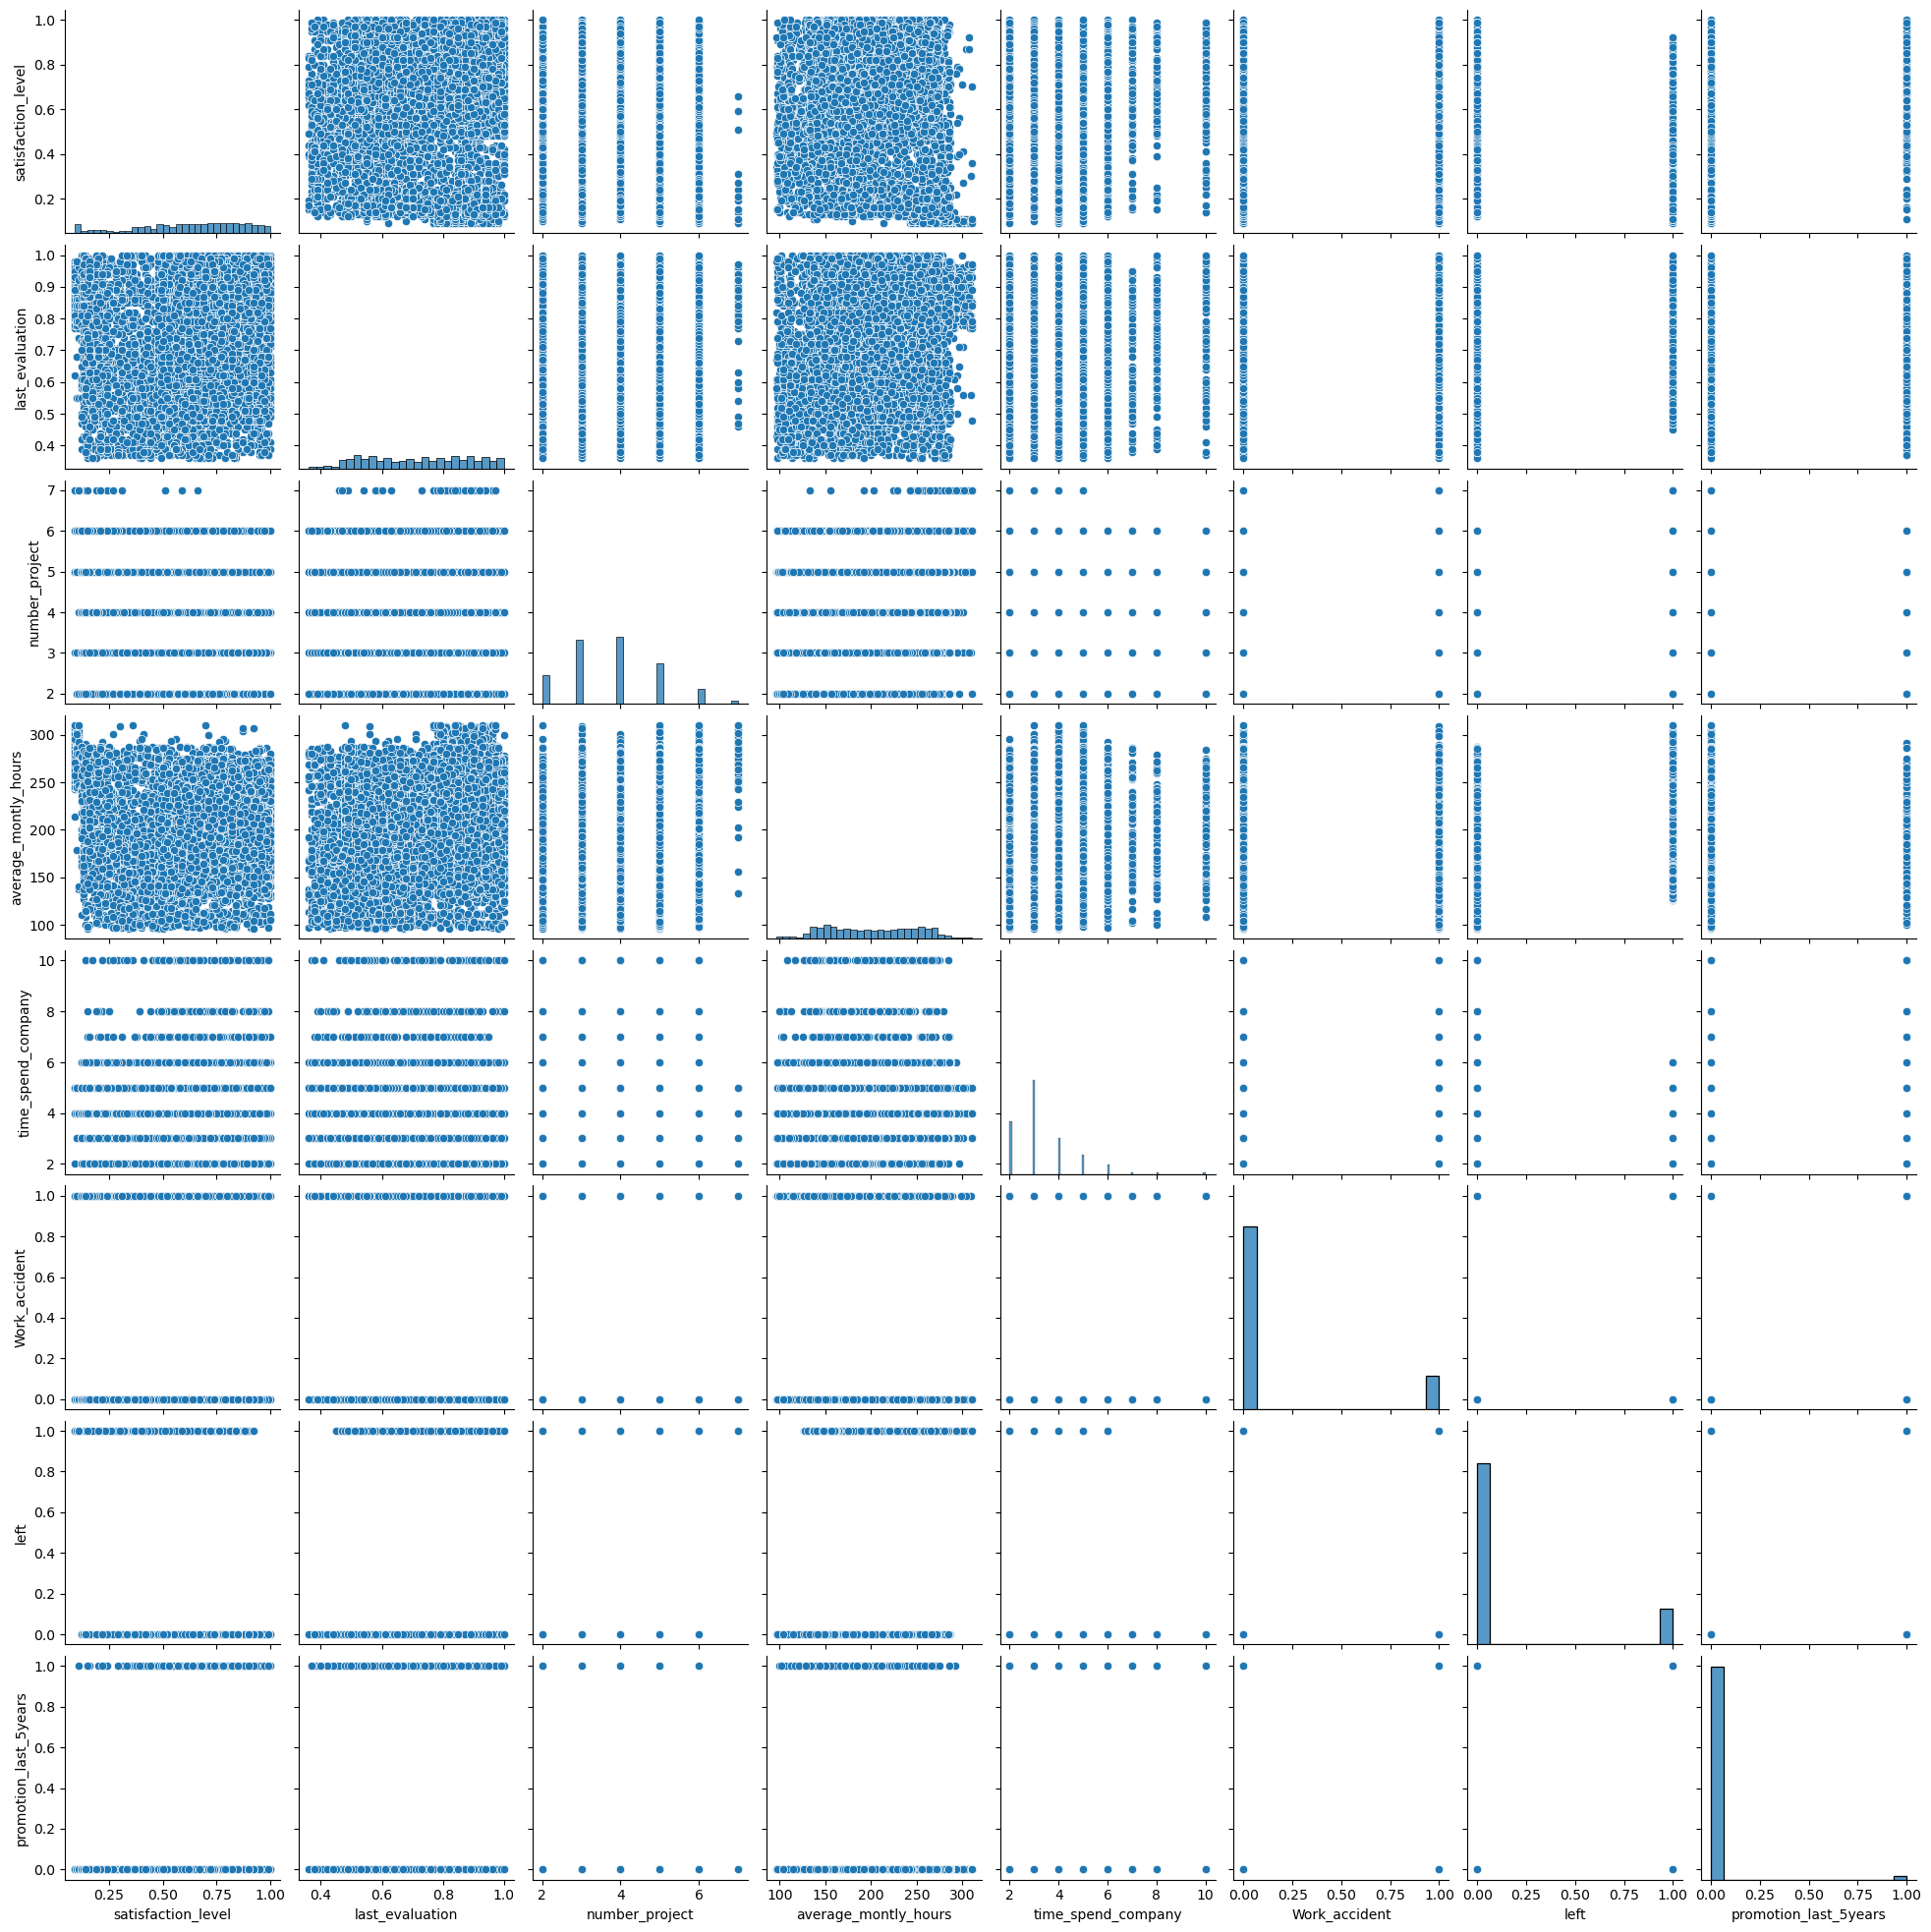

In [12]:
sb.pairplot(df1)

In [13]:
df1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
depertment               0
salary                   0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
df1['depertment'] = lab.fit_transform(df1['depertment'])

In [15]:
df1['Salary'] = pd.factorize(df1['salary'])[0]
df1.drop(['salary'],axis=1,inplace=True)

In [16]:
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,depertment,Salary
0,0.38,0.53,2,157,3,0,1,0,7,0
1,0.80,0.86,5,262,6,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,1
3,0.72,0.87,5,223,5,0,1,0,7,0
4,0.37,0.52,2,159,3,0,1,0,7,0
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,4,2
11996,0.74,0.95,5,266,10,0,0,1,4,2
11997,0.85,0.54,3,185,10,0,0,1,4,2
11998,0.33,0.65,3,172,10,0,0,1,5,2


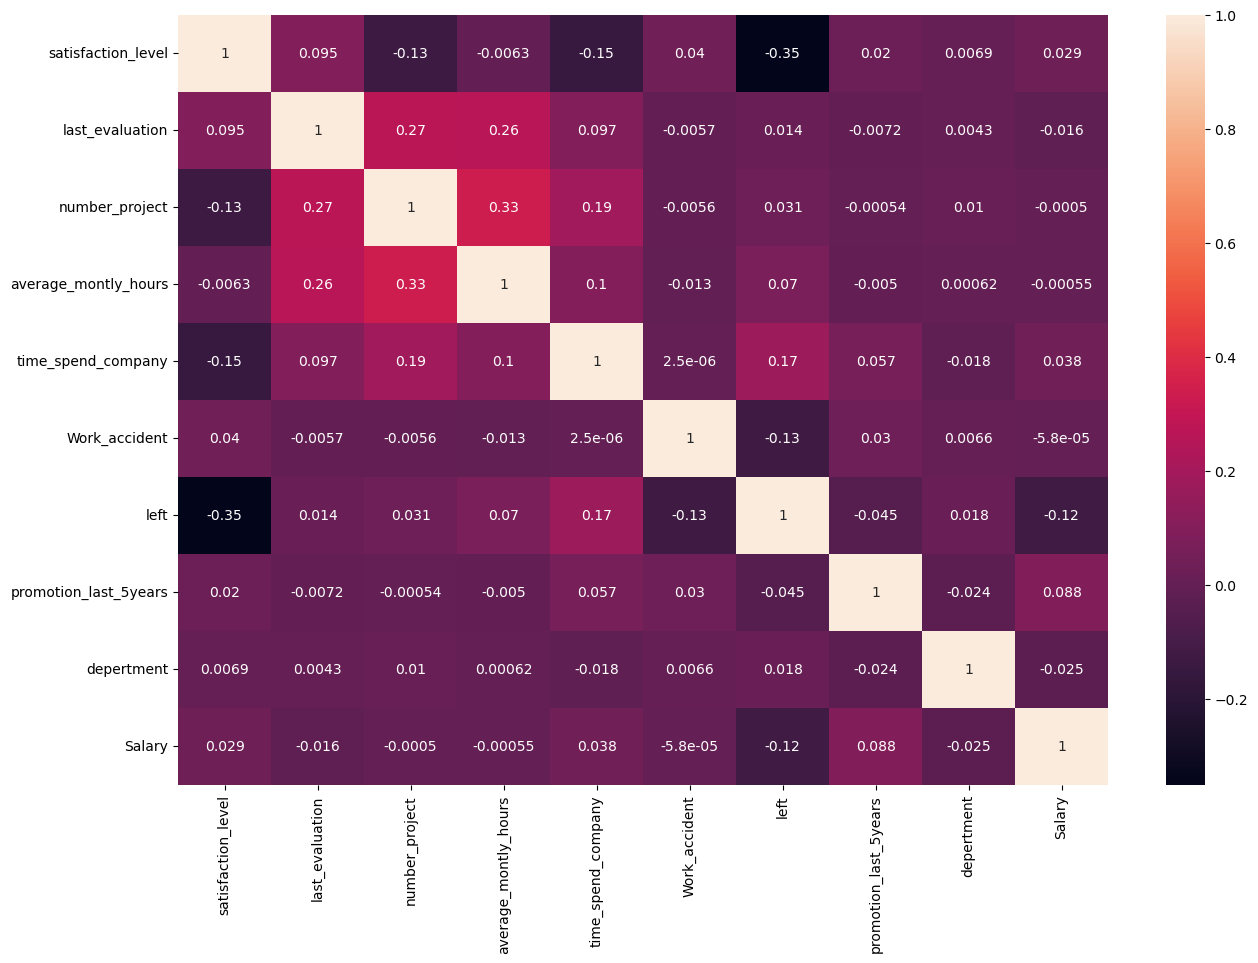

In [17]:
plt.figure(figsize=(15,10))
sb.heatmap(df1.corr(),annot=True)
plt.show()

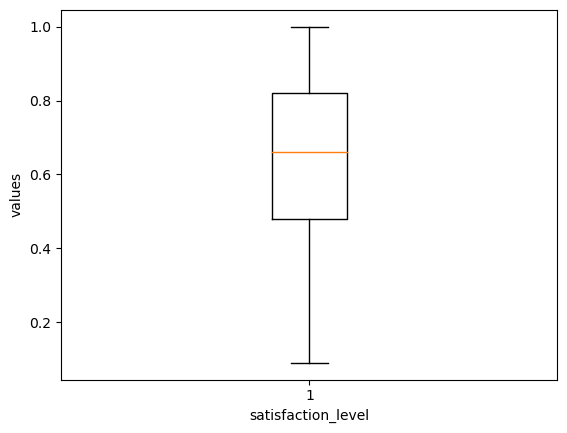

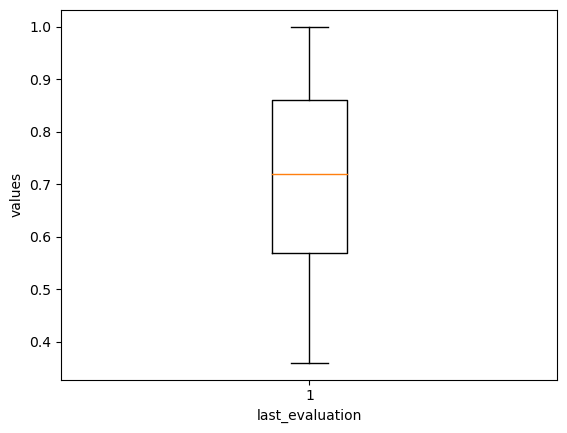

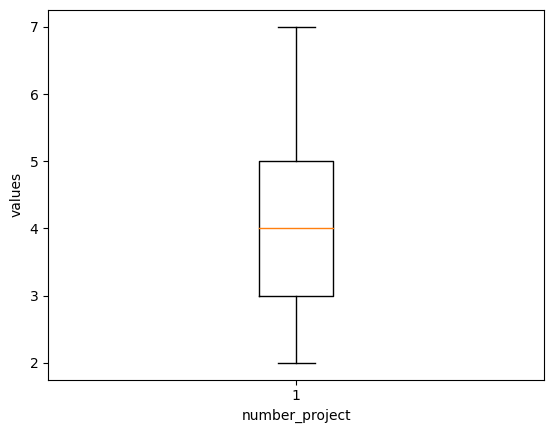

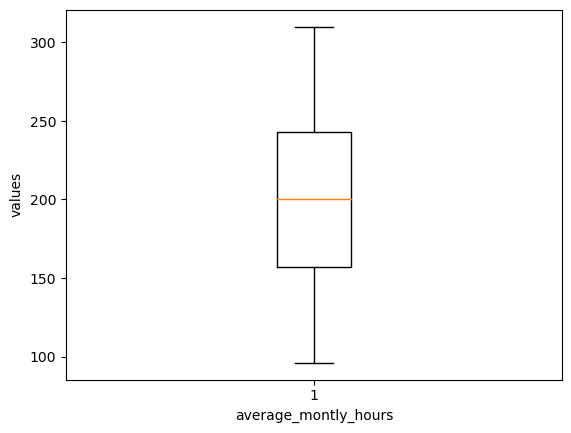

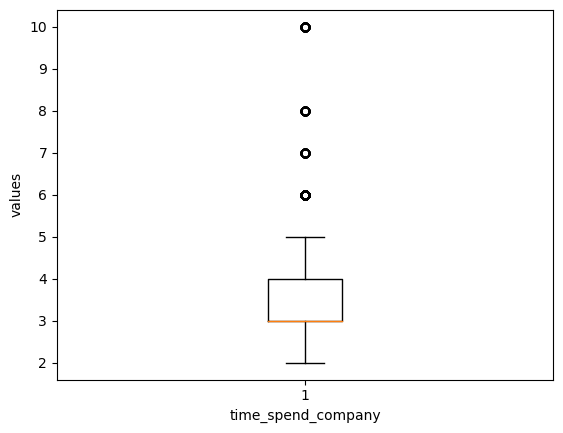

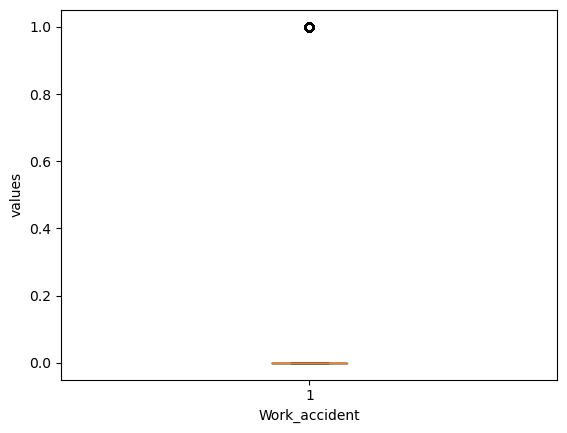

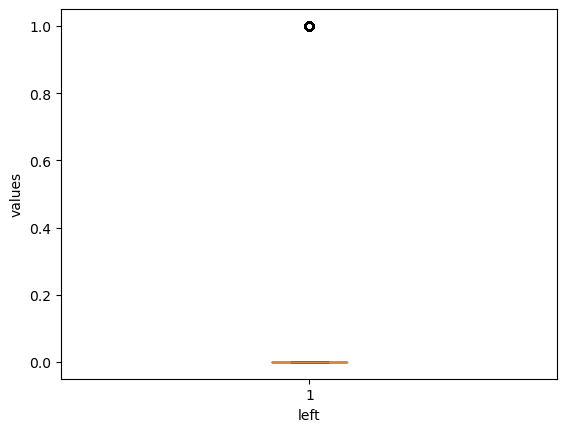

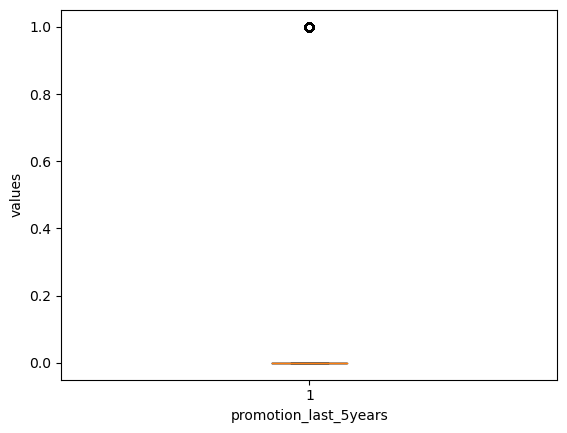

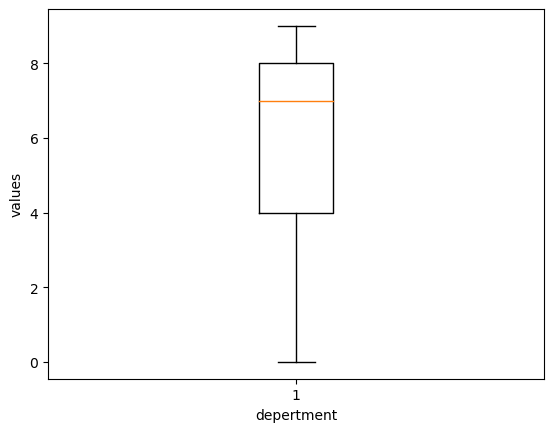

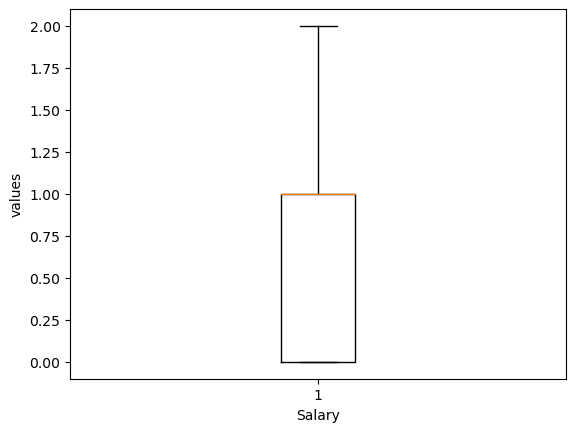

In [18]:
for z in df1.columns:
    plt.boxplot(df1[z])
    plt.xlabel(z)
    plt.ylabel('values')
    plt.show()

In [19]:
Mean = df1['time_spend_company'].mean()
Q1 = np.percentile(df1['time_spend_company'],25)
Q2 = np.median(df1['time_spend_company'])
Q3 = np.percentile(df1['time_spend_company'],75)
IQR = Q3-Q1
L_Fence = Q1-(1.5*IQR)
U_Fence = Q3+(1.5*IQR)

print('Mean is = '+str(Mean))
print('Q1 is = '+str(Q1))
print('Q2 is = '+str(Q2))
print('Q3 is = '+str(Q3))
print('IQR is = '+str(IQR))
print('Lower Fence is = '+str(L_Fence))
print('Upper Fence is = '+str(U_Fence))

Mean is = 3.3648569760653824
Q1 is = 3.0
Q2 is = 3.0
Q3 is = 4.0
IQR is = 1.0
Lower Fence is = 1.5
Upper Fence is = 5.5


In [20]:
X = df1.drop(['left'],axis=1)
Y = df1['left']

In [21]:
from sklearn.preprocessing import StandardScaler
stsc=StandardScaler()
X=stsc.fit_transform(X)

# Train Test :

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8393, 9), (3598, 9), (8393,), (3598,))

# Logistic Regression :

In [23]:
start = time.time()
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
end1 = time.time()
log_time = end1-strat

In [24]:
y_pre = LR.predict(x_test)
y_pre

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
LR.score(x_test,y_test)

0.8374096720400223

In [26]:
LR.score(x_train,y_train)

0.8286667460979388

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc
CM = confusion_matrix(y_test,y_pre)
CM

array([[2924,  108],
       [ 477,   89]], dtype=int64)

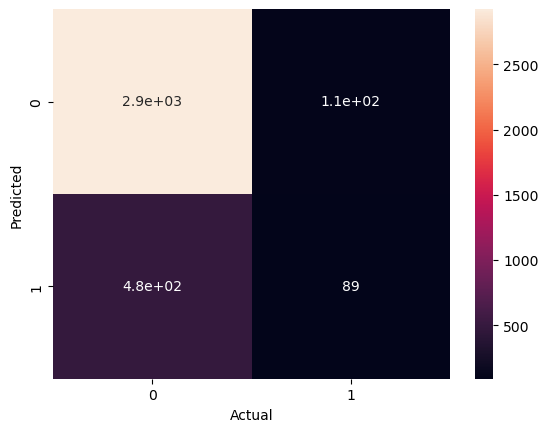

In [28]:
sb.heatmap(CM,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [29]:
Lf = pd.DataFrame({'Actual':y_test,'predicted':y_pre})
Lf

,Actual,predicted
9136,0,0
4836,0,0
11041,0,0
9476,0,0
3728,0,0
...,...,...
8107,0,0
6897,0,0
5103,0,0
2948,0,0


In [30]:
Acc = accuracy_score(y_test,y_pre)
pre9 = Lf['predicted'].value_counts()[1]
Ac9 = Lf['Actual'].value_counts()[1]
e9 = Lf.loc[Lf['Actual']==1]
f9 = e9.loc[e9['predicted']==1]
pression9 = (f9['predicted'].value_counts()[1])/pre9
recall9 = (f9['predicted'].value_counts()[1])/Ac9
F19 = (2*pression9*recall9)

print('Accuracy score is = '+str(Acc))
print('Pression score (True Positive) is = '+str(pression9)) 
print('Recall score (True Positive) is = '+str(recall9))
print('F1 score (True Positive) is = '+str(F19))


Accuracy score is = 0.8374096720400223
Pression score (True Positive) is = 0.4517766497461929
Recall score (True Positive) is = 0.15724381625441697
F1 score (True Positive) is = 0.1420781690014529


# DecisionTree :

In [31]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.4665372705734165, 0.9772727272727273, 'X[0] <= -0.683\ngini = 0.282\nsamples = 8393\nvalue = [6968, 1425]'),
 Text(0.15665487044145873, 0.9318181818181818, 'X[2] <= -1.12\ngini = 0.5\nsamples = 2005\nvalue = [997, 1008]'),
 Text(0.05710172744721689, 0.8863636363636364, 'X[1] <= -0.842\ngini = 0.293\nsamples = 729\nvalue = [130, 599]'),
 Text(0.03166986564299424, 0.8409090909090909, 'X[3] <= -0.79\ngini = 0.146\nsamples = 645\nvalue = [51, 594]'),
 Text(0.01727447216890595, 0.7954545454545454, 'X[3] <= -1.549\ngini = 0.086\nsamples = 619\nvalue = [28, 591]'),
 Text(0.013435700575815739, 0.75, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.02111324376199616, 0.75, 'X[0] <= -1.202\ngini = 0.045\nsamples = 605\nvalue = [14, 591]'),
 Text(0.011516314779270634, 0.7045454545454546, 'X[3] <= -1.241\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.007677543186180422, 0.6590909090909091, 'X[7] <= 0.734\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.003838771593090211, 

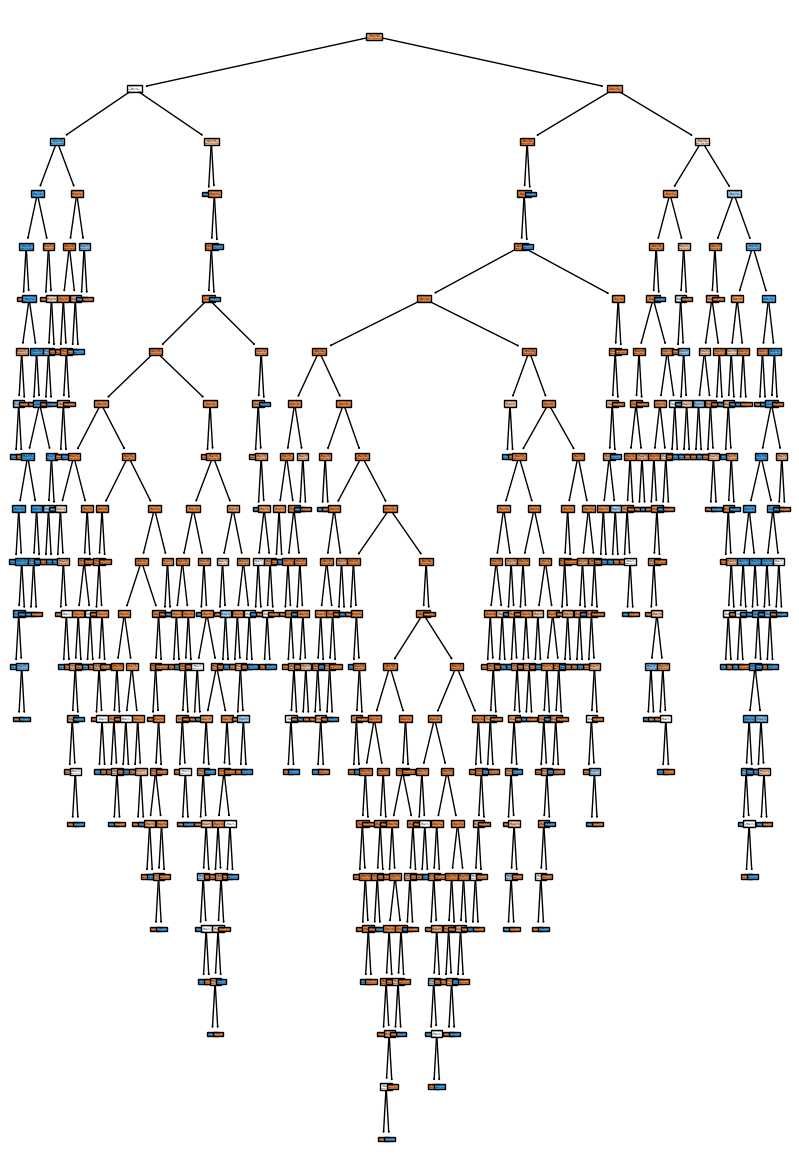

In [32]:
plt.figure(figsize=(10,15))
tree.plot_tree(DT,filled=True)

In [33]:
y_pre1 = DT.predict(x_test)
y_pre1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
DT.score(x_test,y_test)

0.9691495275152863

In [35]:
DT.score(x_train,y_train)

1.0

# GridSearchCV :

In [36]:
Grid_Prm = {'criterion':['gini','entropy'],
           'splitter':['best','random'],
           'max_depth':range(2,10,1),
           'min_samples_split':range(2,5,1),
           'min_samples_leaf':range(1,5,1),
           'ccp_alpha':np.random.rand(20)}

In [37]:
start1 = time.time()
from sklearn.model_selection import GridSearchCV
Gcv = GridSearchCV(estimator=DT,param_grid=Grid_Prm,cv=10,n_jobs=1)
Gcv.fit(x_train,y_train)
Gcv.best_params_
end2=time.time()

### Best Parameters 

In [38]:
'''criterion='entropy',splitter='best',max_depth=4,min_samples_leaf=1,min_samples_split=2,ccp_alpha=0.016960337297919903'''

"criterion='entropy',splitter='best',max_depth=4,min_samples_leaf=1,min_samples_split=2,ccp_alpha=0.016960337297919903"

In [39]:
dis_time = end2-start1
dis_time

1660.0836231708527

In [40]:
DT1 = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=4,min_samples_leaf=1,min_samples_split=2,ccp_alpha=0.016960337297919903)
DT1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.016960337297919903, criterion='entropy',
                       max_depth=4)

In [41]:
y_pre2 = DT1.predict(x_test)
y_pre2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
y_pre_tr = DT1.predict(x_train)
y_pre_tr

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
DT1.score(x_train,y_train)

0.9702132729655666

In [44]:
DT1.score(x_test,y_test)

0.9733185102834908

In [45]:
CM1 = confusion_matrix(y_test,y_pre2)
CM1

array([[2979,   53],
       [  43,  523]], dtype=int64)

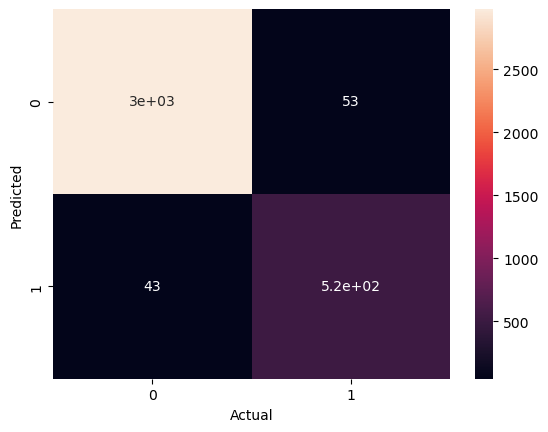

In [46]:
sb.heatmap(CM1,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [47]:
Ac1 = accuracy_score(y_test,y_pre2)
print('Accuracy score (test) is = '+str(Ac1))
Ac2 = accuracy_score(y_train,y_pre_tr)
print('Accuracy score (train) is = '+str(Ac2))

Accuracy score (test) is = 0.9733185102834908
Accuracy score (train) is = 0.9702132729655666


In [48]:
DS = pd.DataFrame({'Actual':y_test,'predicted':y_pre2})
DS

,Actual,predicted
9136,0,0
4836,0,0
11041,0,0
9476,0,0
3728,0,0
...,...,...
8107,0,0
6897,0,0
5103,0,0
2948,0,0


In [49]:
pre10 = DS['predicted'].value_counts()[1]
Ac10 = DS['Actual'].value_counts()[1]
e10 = DS.loc[DS['Actual']==1]
f10 = e10.loc[e10['predicted']==1]
pression10 = (f10['predicted'].value_counts()[1])/pre10
recall10 = (f10['predicted'].value_counts()[1])/Ac10
F110 = 2*pression10*recall10

print('Pression score (True Positive) is = '+str(pression10)) 
print('Recall score (True Positive) is = '+str(recall10))
print('F1 score (True Positive) is = '+str(F110))


Pression score (True Positive) is = 0.9079861111111112
Recall score (True Positive) is = 0.9240282685512368
F1 score (True Positive) is = 1.678009668237142


# RandomForestClassifier :

In [50]:
from sklearn.ensemble import RandomForestClassifier
Ran1 = RandomForestClassifier()
Ran1.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_pre3 = Ran1.predict(x_test)
y_pre3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
Ran1.score(x_test,y_test)

0.9863813229571985

In [53]:
Ran1.score(x_train,y_train)

1.0

In [54]:
con4 = confusion_matrix(y_test,y_pre3)
con4

array([[3023,    9],
       [  40,  526]], dtype=int64)

<AxesSubplot:>

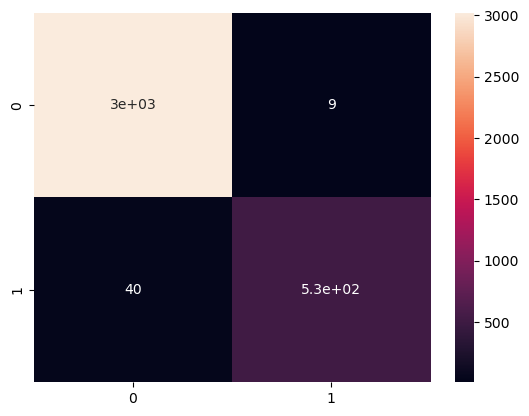

In [55]:
sb.heatmap(con4,annot=True)

In [56]:
rf = pd.DataFrame({'Actual':y_test,'predicted':y_pre3})
rf

,Actual,predicted
9136,0,0
4836,0,0
11041,0,0
9476,0,0
3728,0,0
...,...,...
8107,0,0
6897,0,0
5103,0,0
2948,0,0


In [57]:
acc4 = accuracy_score(y_test,y_pre3)
pre = rf['predicted'].value_counts()[1]
Ac = rf['Actual'].value_counts()[1]
e = rf.loc[rf['Actual']==1]
f = e.loc[e['predicted']==1]
pression2 = (f['predicted'].value_counts()[1])/pre
recall2 = (f['predicted'].value_counts()[1])/Ac
F1 = 2*pression2*recall2

print('Accuracy score is = '+str(acc4))
print('Pression score is = '+str(pression2))
print('Recall score is = '+str(recall2))
print('F1 score is = '+str(F1))

Accuracy score is = 0.9863813229571985
Pression score is = 0.983177570093458
Recall score is = 0.9293286219081273
F1 score is = 1.827390112611869


# KNN :

In [58]:
from sklearn.neighbors import KNeighborsClassifier
Kn1 = KNeighborsClassifier()
Kn1.fit(x_train,y_train)

KNeighborsClassifier()

In [59]:
y_pre_kn = Kn1.predict(x_test)
y_pre_kn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
Kn1.score(x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9616453585325181

In [61]:
df3 = pd.DataFrame({'Actual':y_test,'predicted':y_pre_kn})

In [62]:
Acc3 = accuracy_score(y_test,y_pre_kn)
pre12 = df3['predicted'].value_counts()[1]
Ac12 = df3['Actual'].value_counts()[1]
e12 = df3.loc[df3['Actual']==1]
f12 = e12.loc[e12['predicted']==1]
pression12 = (f12['predicted'].value_counts()[1])/pre12
recall12 = (f12['predicted'].value_counts()[1])/Ac12
F112 = 2*pression12*recall12

print('Accuracy score is = '+str(Acc3))
print('Pression score (True Positive) is = '+str(pression12))
print('Recall score (True Positive) is = '+str(recall12))
print('F1 score (True Positive) is = '+str(F112))

Accuracy score is = 0.9616453585325181
Pression score (True Positive) is = 0.8554817275747508
Recall score (True Positive) is = 0.9098939929328622
F1 score (True Positive) is = 1.5567953699681862


In [63]:
Kn1.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9694983915167401

# Grid Serarch CV : 

In [64]:
grid_prm3 = {'n_neighbors':range(3,10,1),
          'weights' : ['uniform', 'distance']}

In [65]:
start5 = time.time()
grid_search_k = GridSearchCV(estimator=Kn1,param_grid=grid_prm3,cv=10,n_jobs=1)
grid_search_k.fit(x_train,y_train)
end6 = time.time()
grid_search_k.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'n_neighbors': 4, 'weights': 'uniform'}

In [66]:
Knn_time = end6-start5
Knn_time

40.0638222694397

In [67]:
Kn2 = KNeighborsClassifier(n_neighbors=4,weights='uniform')
Kn2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [68]:
y_pre_k2 = Kn2.predict(x_test)
y_pre_k2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
Kn2.score(x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9669260700389105

In [70]:
Kn2.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9736685333015608

In [71]:
kf=pd.DataFrame({'Actual':y_test,'predicted':y_pre_kn})

# Naive Bayes :

In [72]:
from sklearn.naive_bayes import GaussianNB
Nb = GaussianNB()
Nb.fit(x_train,y_train)

GaussianNB()

In [73]:
y_pre_nb = Nb.predict(x_test)
y_pre_nb

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [74]:
Nb.score(x_test,y_test)

0.8476931628682601

In [75]:
Nb.score(x_train,y_train)

0.8502323364708686

In [76]:
nf = pd.DataFrame({'Actual':y_test,'predicted':y_pre_nb})

<AxesSubplot:>

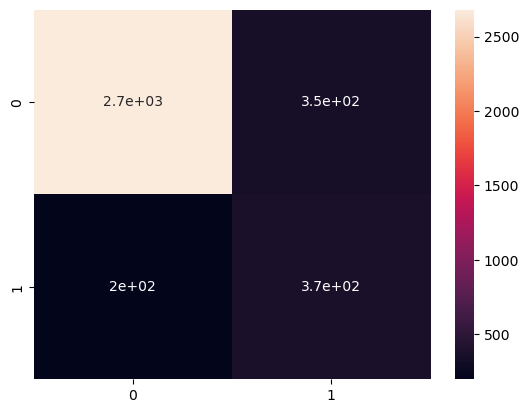

In [77]:
con7 = confusion_matrix(y_test,y_pre_nb)
sb.heatmap(con7,annot=True)

In [78]:
acc7 = accuracy_score(y_test,y_pre_nb)
pre3 = nf['predicted'].value_counts()[1]
Ac3 = nf['Actual'].value_counts()[1]
e3 = nf.loc[rf['Actual']==1]
f3 = e3.loc[e3['predicted']==1]
pression3 = (f3['predicted'].value_counts()[1])/pre3
recall3 = (f3['predicted'].value_counts()[1])/Ac3
F13 = (2*pression3*recall3)

print('Accuracy score is = '+str(acc7))
print('Pression score (True Positive) is = '+str(pression3))
print('Recall score (True Positive) is = '+str(recall3))
print('F1 score (True Positive) is = '+str(F13))

Accuracy score is = 0.8476931628682601
Pression score (True Positive) is = 0.5125
Recall score (True Positive) is = 0.6519434628975265
F1 score (True Positive) is = 0.6682420494699646


# Accuracy Score :

In [79]:
Acc_df = pd.DataFrame({'LogisticRegression':Acc,'DecisionTree':Ac1,'RandomForest':acc4,'KNN':Kn2.score(x_test,y_test),'Naive Bayes' :acc7},index=[0])
Acc_df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,LogisticRegression,DecisionTree,RandomForest,KNN,Naive Bayes
0,0.83741,0.973319,0.986381,0.966926,0.847693


# Roc Curve : 

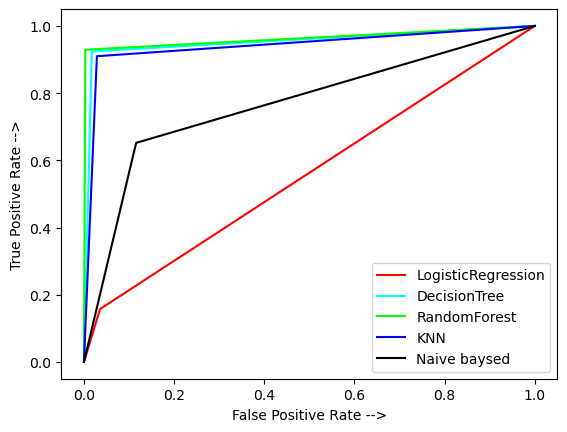

In [80]:
l_fpr,l_tpr,threshold_l=roc_curve(y_test,y_pre)
d_fpr,d_tpr,threshold_d=roc_curve(y_test,y_pre2)
r_fpr,r_tpr,threshold_r=roc_curve(y_test,y_pre3)
k_fpr,k_tpr,threshold_k=roc_curve(y_test,y_pre_kn)
n_fpr,n_tpr,threshold_n=roc_curve(y_test,y_pre_nb)

plt.plot(l_fpr,l_tpr,c='red',label='LogisticRegression')
plt.plot(d_fpr,d_tpr,c='cyan',label='DecisionTree')
plt.plot(r_fpr,r_tpr,c='lime',label='RandomForest')
plt.plot(k_fpr,k_tpr,c='blue',label='KNN')
plt.plot(n_fpr,n_tpr,c='black',label='Naive baysed')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()